Reinforcement Learning (RL) is a type of machine learning where an **agent learns to make decisions** by interacting with an **environment**. The goal is to learn a **policy** that maximizes **cumulative reward** over time. It is inspired by behavioral psychology — learning by trial and error, using feedback (rewards or punishments).

### Reinforcement Learning Loop (Core Idea)

1. The **agent** observes the **state** of the environment.
2. It takes an **action**.
3. The environment transitions to a new **state** and gives the agent a **reward**.
4. The agent updates its **policy** (strategy) based on this experience.

This loop continues, and over time, the agent learns to take better actions.


### Key Concepts and Formalism

RL is typically modeled as a **Markov Decision Process (MDP)** defined by the tuple:

$$
\mathcal{M} = (\mathcal{S}, \mathcal{A}, P, R, \gamma)
$$

Where:

- **$\mathcal{S}$**: Set of **states** the agent can be in.
- **$\mathcal{A}$**: Set of **actions** the agent can take.
- **$P(s'|s,a)$**: **Transition probability** function — the probability of moving to state \( s' \) after taking action \( a \) in state \( s \).
- **$R(s,a)$**: **Reward function** — gives the immediate reward after taking action \( a \) in state \( s \).
- **$\gamma \in [0,1]$**: **Discount factor** — determines the importance of future rewards.


### 1. **State $ s $**  
A representation of the current situation the agent is in.  
Example: the position of a robot, current game board, etc.

### 2. **Action $ a $**  
An operation the agent can perform to influence the state.  
Example: move left/right, buy/sell, pick up/drop.

### 3. **Policy $ \pi(a|s) $**  
A mapping from states to a probability distribution over actions. It defines the agent's **behavior**.

- **Deterministic policy**: $ \pi(s) = a $
- **Stochastic policy**: $ \pi(a|s) = \mathbb{P}(a \text{ in state } s) $

### 4. **Reward $ r $**  
A scalar feedback signal from the environment. The agent tries to maximize the **total reward** it gets.

### 5. **Return $ G_t $**  
The **total accumulated reward** starting at time $ t $. It is often defined as:

$$
G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \dots = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}
$$

This is what the agent tries to **maximize**.


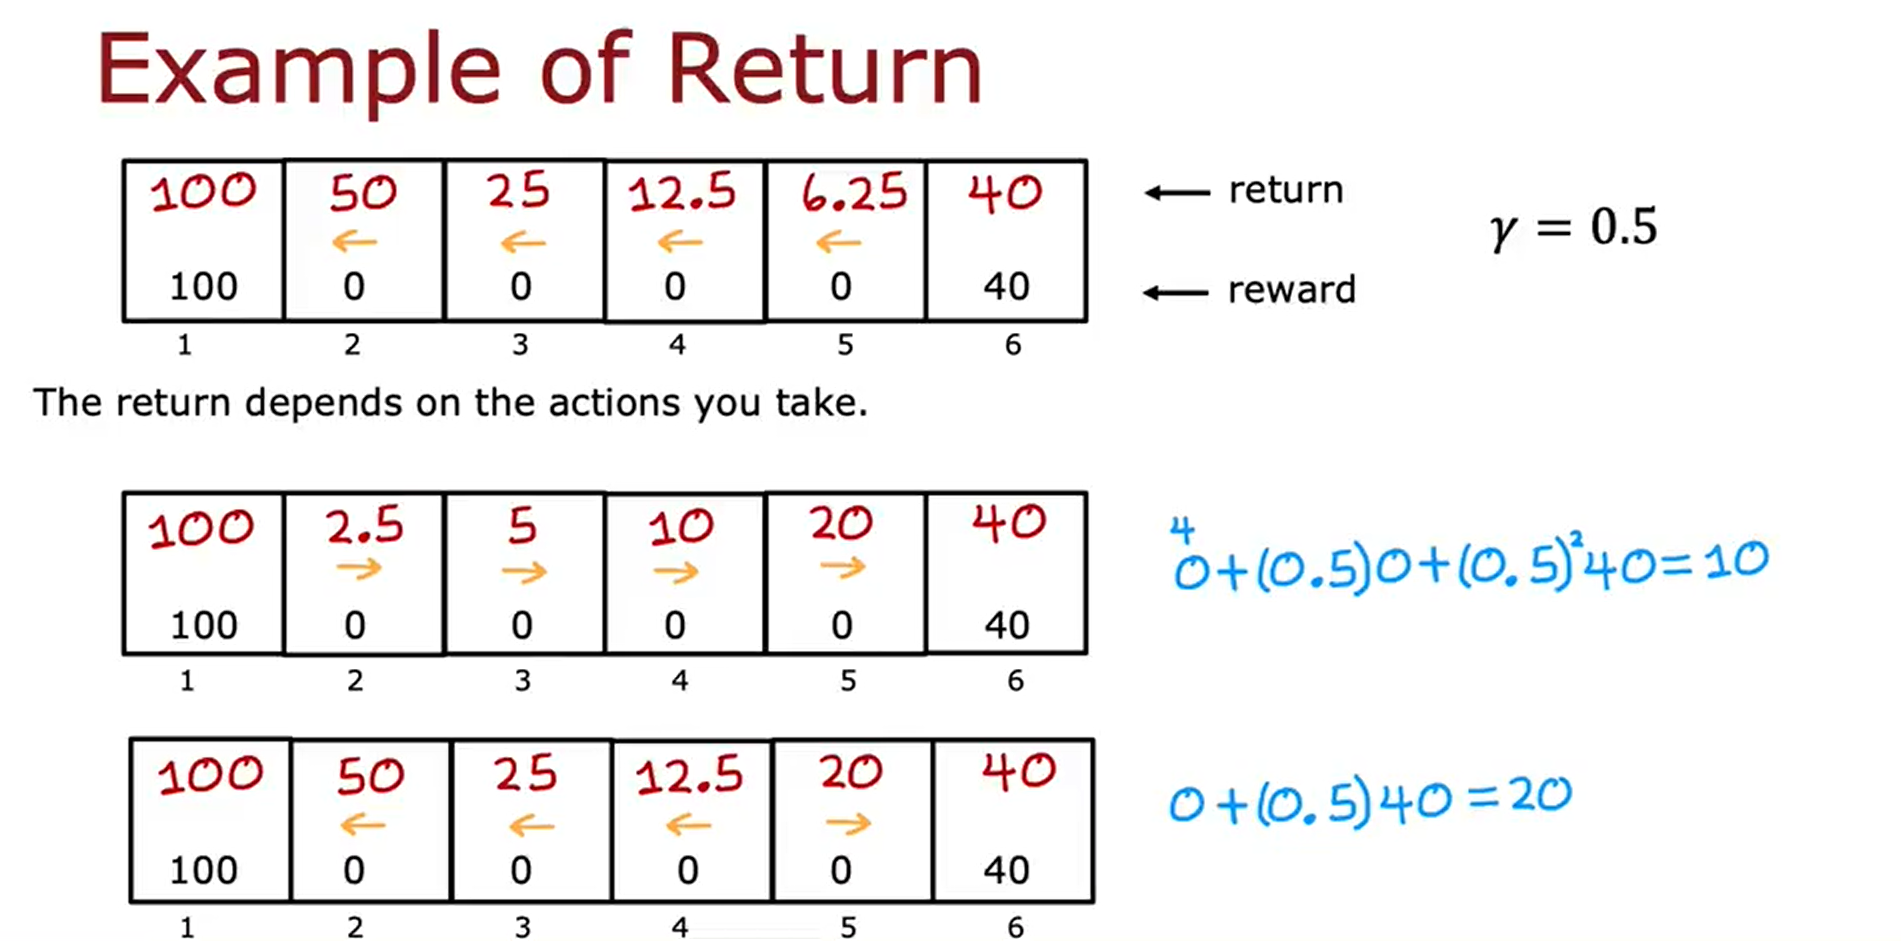


### Objective

Learn an **optimal policy** $ \pi^* $ that **maximizes the expected return** from every state:

$$
\pi^* = \arg\max_{\pi} \mathbb{E}[G_t | \pi]
$$


### Value Functions

Value functions estimate how **good** it is to be in a state or to take a certain action.

- **State-Value Function** $ V^\pi(s) $: Expected return starting from state $ s $ following policy $ \pi $:

$$
V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k r_{t+k+1} \mid s_t = s \right]
$$

- **Action-Value Function** $ Q^\pi(s, a) $: Expected return from state $ s $, taking action $ a $, and then following policy $ \pi $:

$$
Q^\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k r_{t+k+1} \mid s_t = s, a_t = a \right]
$$


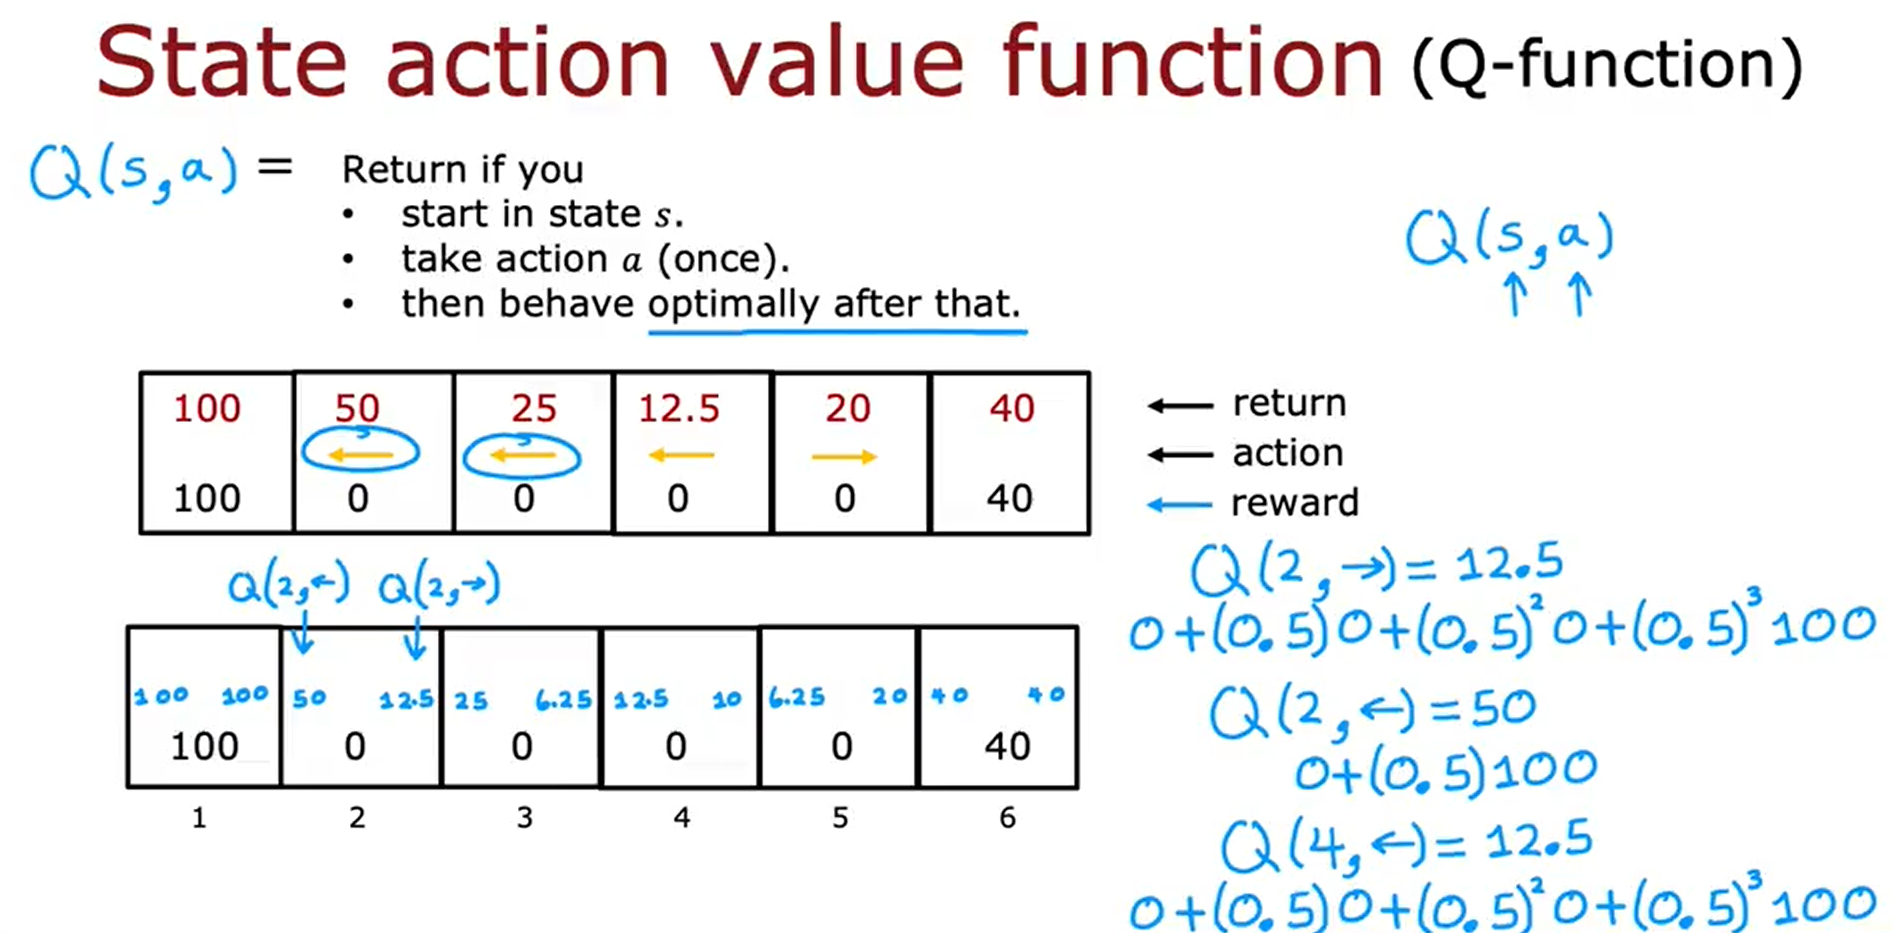


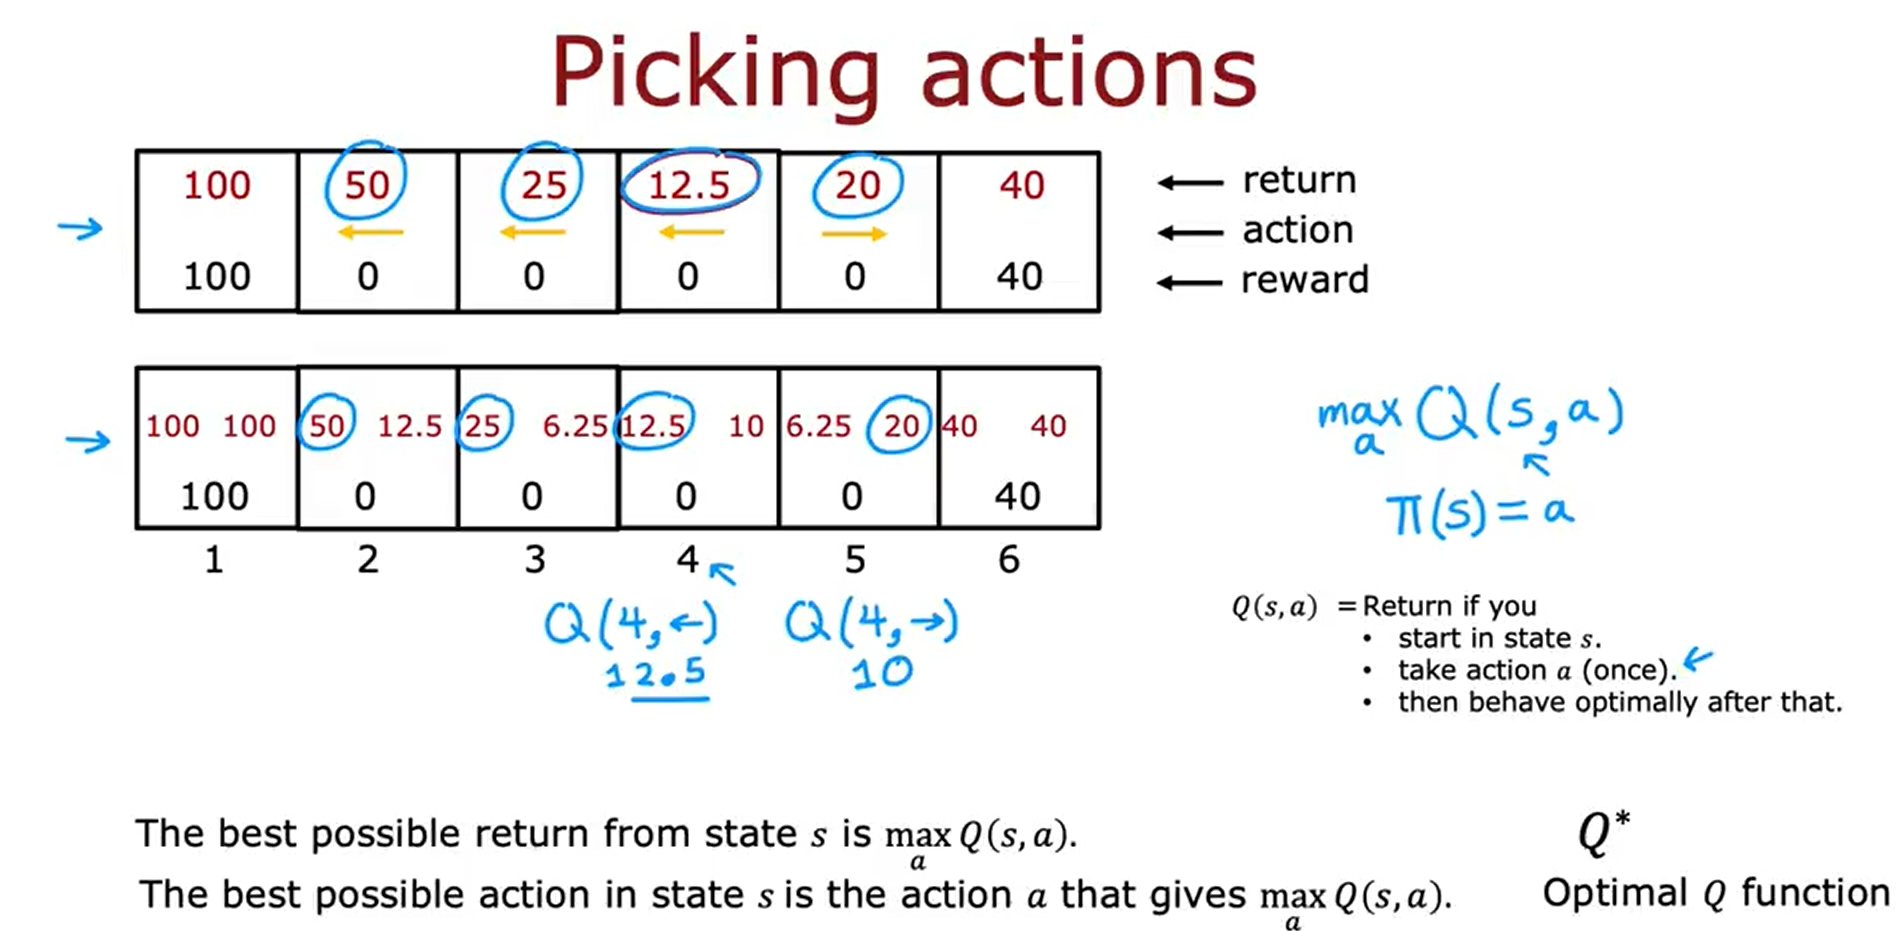


### The Bellman Equation

The **Bellman Equation** is a fundamental concept in **reinforcement learning** and **dynamic programming**. It provides a **recursive decomposition** of the value function — meaning it breaks down the expected value of a state (or action) into immediate reward and the value of the next state.


### **Purpose of the Bellman Equation**

It gives a **principled way** to compute the **value function**, which is the expected return from a state or state-action pair, under a given policy.

#### Types of Bellman Equations

There are **two main forms** depending on the value function we're interested in:

##### 1. **State-Value Function $ V^\pi(s) $**

For a given **policy** $ \pi $, the **Bellman Expectation Equation** is:

$$
V^\pi(s) = \mathbb{E}_{a \sim \pi(\cdot|s)} \left[ R(s, a) + \gamma \mathbb{E}_{s' \sim P(\cdot|s, a)} \left[ V^\pi(s') \right] \right]
$$

Or written more compactly:

$$
V^\pi(s) = \sum_{a} \pi(a|s) \sum_{s'} P(s'|s, a) \left[ R(s,a) + \gamma V^\pi(s') \right]
$$

**Explanation**:

- $ V^\pi(s) $: Expected return from state $ s $ following policy $ \pi $
- $ \pi(a|s) $: Probability of choosing action $ a $ in state $ s $
- $ P(s'|s,a) $: Probability of reaching next state $ s' $
- $ R(s,a) $: Immediate reward from action $ a $ in state $ s $
- $ \gamma $: Discount factor

So: the **value of a state** is the expected immediate reward **plus** the expected discounted value of the **next state**.


##### 2. **Action-Value Function $ Q^\pi(s, a) $**

$$
Q^\pi(s, a) = R(s, a) + \gamma \sum_{s'} P(s'|s, a) \sum_{a'} \pi(a'|s') Q^\pi(s', a')
$$

**Explanation**:

- After taking action $ a $ in state $ s $, you get a reward $ R(s, a) $.
- Then, with probability $ P(s'|s, a) $, you move to state $ s' $.
- From there, you follow the policy $ \pi $, which gives you an expected return of $ Q^\pi(s', a') $.


### Bellman Optimality Equation

When we want the **optimal value function**, we use:

#### State-value form:

$$
V^*(s) = \max_a \sum_{s'} P(s'|s, a) \left[ R(s, a) + \gamma V^*(s') \right]
$$

#### Action-value form:

$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s'|s, a) \max_{a'} Q^*(s', a')
$$

These equations describe the **best possible expected return** that can be achieved from state \( s \) (or state-action pair \( (s,a) \)).


### Why is the Bellman Equation Important?

- **Foundation of RL algorithms** like Value Iteration, Policy Iteration, Q-Learning.
- It connects **immediate reward** to **future return** recursively.
- Allows for **iterative computation** of the value functions.


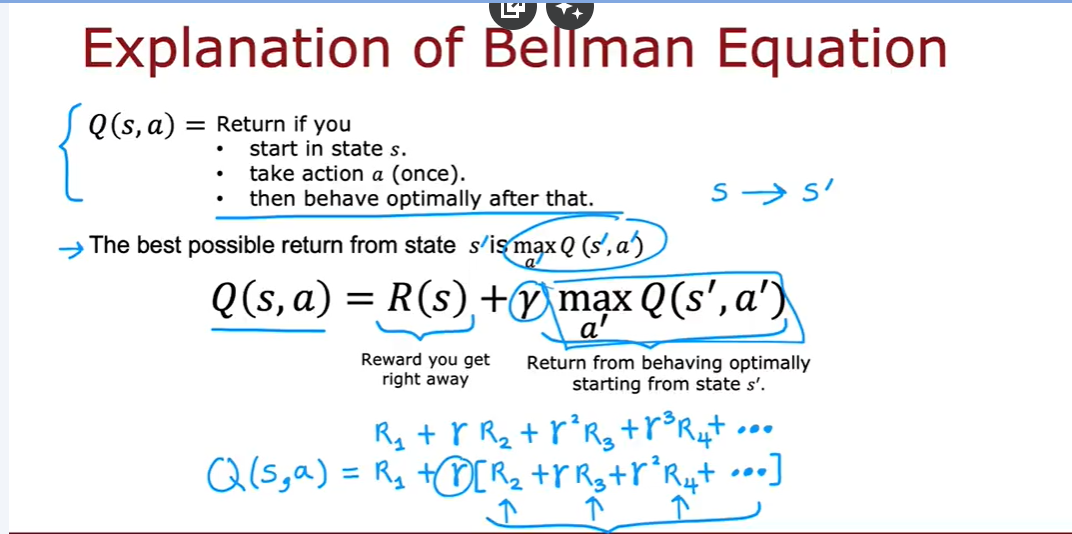




### Types of RL Algorithms

- **Model-Free**: Learns the policy directly from interaction (e.g. Q-learning, Policy Gradient).
- **Model-Based**: Learns a model of the environment (transition probabilities, rewards), then plans.

### Examples:
- **Q-Learning** (off-policy, model-free)
- **SARSA** (on-policy)
- **Deep Q-Networks (DQN)** — uses neural networks to approximate Q-values.
- **Policy Gradient / REINFORCE**
- **Actor-Critic** methods


### Applications of Reinforcement Learning

- Game playing (Chess, Go, Atari)
- Robotics
- Recommender systems
- Portfolio management
- Autonomous vehicles

# The Deep Q-Networks algorithm

The **Deep Q-Learning (DQN)** algorithm combines **Q-learning**, a reinforcement learning method, with **deep neural networks** to approximate the **Q-function** — enabling learning in high-dimensional or continuous state spaces (e.g., images, raw pixels, etc.).


### What is Deep Q-Learning?

Instead of storing the Q-values in a table (which is impractical for large state spaces), **Deep Q-Learning** uses a **neural network** $ Q(s, a; \theta) $ to approximate the Q-function.


### **Core Components of DQN**

### 1. **Q-Network**

A neural network $ Q(s, a; \theta) $ takes a state $ s $ as input and outputs Q-values for all possible actions.

### 2. **Target Network**

A separate network $ Q(s, a; \theta^-) $ is used to compute the target in the loss function. It is a **copy of the main network**, updated less frequently. This helps **stabilize training**.

### 3. **Replay Buffer**

A memory $ \mathcal{D} $ where the agent stores past experiences $ (s, a, r, s', \text{done}) $. This allows the model to **learn from a randomized batch of experiences**, breaking the temporal correlation in updates.


## **Algorithm Steps (DQN)**

1. **Initialize**:
   - Q-network with random weights $ \theta $
   - Target Q-network with weights $ \theta^- = \theta $
   - Replay buffer $ \mathcal{D} $

2. **For each episode**:
   - Observe initial state $ s $
   - For each time step:
     1. Select action $ a $ using an **ε-greedy policy**:
        $$
        a = \begin{cases}
        \text{random action} & \text{with probability } \varepsilon \\
        \arg\max_{a'} Q(s, a'; \theta) & \text{otherwise}
        \end{cases}
        $$
     2. Take action $ a $, observe reward $ r $, next state $ s' $, and done flag
     3. Store $ (s, a, r, s', \text{done}) $ in replay buffer
     4. Sample mini-batch of experiences from replay buffer
     5. Compute **target Q-value**:
        $$
        y = 
        \begin{cases}
        r & \text{if episode ends at } s' \\
        r + \gamma \max_{a'} Q(s', a'; \theta^-) & \text{otherwise}
        \end{cases}
        $$
     6. Compute **loss** (e.g. Mean Squared Error):
        $$
        \mathcal{L}(\theta) = \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}} \left[ \left( y - Q(s,a;\theta) \right)^2 \right]
        $$
     7. Perform **gradient descent** step on $ \theta $ to minimize the loss
     8. Every $ C $ steps, **update the target network**: $ \theta^- \leftarrow \theta $